<a href="https://colab.research.google.com/github/ridvanyigit/Machine_Learning/blob/main/ML_Final_Rapor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HIGGS Dataset Sınıflandırma Projesi Raporu

## Giriş

Bu rapor, `HIGGS` veri setini kullanarak parçacık fiziği deneylerinden elde edilen verileri sınıflandırma projesini özetlemektedir. Amaç, Higgs bozonu sinyallerini arka plan gürültüsünden ayırmak için farklı makine öğrenimi modellerinin performansını değerlendirmektir. Proje, veri ön işleme, özellik seçimi, model eğitimi ve değerlendirme adımlarını içermektedir.

## 1. Veri Yükleme ve Ön İşleme

### 1.1. Veri Seti Örnekleme
HIGGS veri setinden rastgele olarak 50,000 örneklem alınmıştır.

### 1.2. Hedef Değişken Dağılımı
Hedef değişkenin dağılımı aşağıdaki gibidir:
* Label 0 (Arka plan): 23,686 (%47.4)
* Label 1 (Sinyal): 26,314 (%52.6)

### 1.3. Aykırı Değer Analizi ve Temizleme
Veri setinde aykırı değerler $IQR$ yöntemiyle tespit edilmiş ve `Winsorization` tekniği ile temizlenmiştir. Toplamda 23545 satırda aykırı değer tespit edilmiştir.

### 1.4. Veri Ölçekleme
MinMaxScaler kullanılarak özellikler 0 ile 1 arasına ölçeklenmiştir.

## 2. Özellik Seçimi

### 2.1. ANOVA F-Score
ANOVA F-score kullanılarak en iyi 15 özellik seçilmiştir:

1.  feature_1
2.  feature_4
3.  feature_6
4.  feature_10
5.  feature_13
6.  feature_14
7.  feature_17
8.  feature_18
9.  feature_21
10. feature_22
11. feature_23
12. feature_24
13. feature_26
14. feature_27
15. feature_28

Seçilen 15 özellik arasındaki korelasyon matrisi aşağıda sunulmuştur:

---
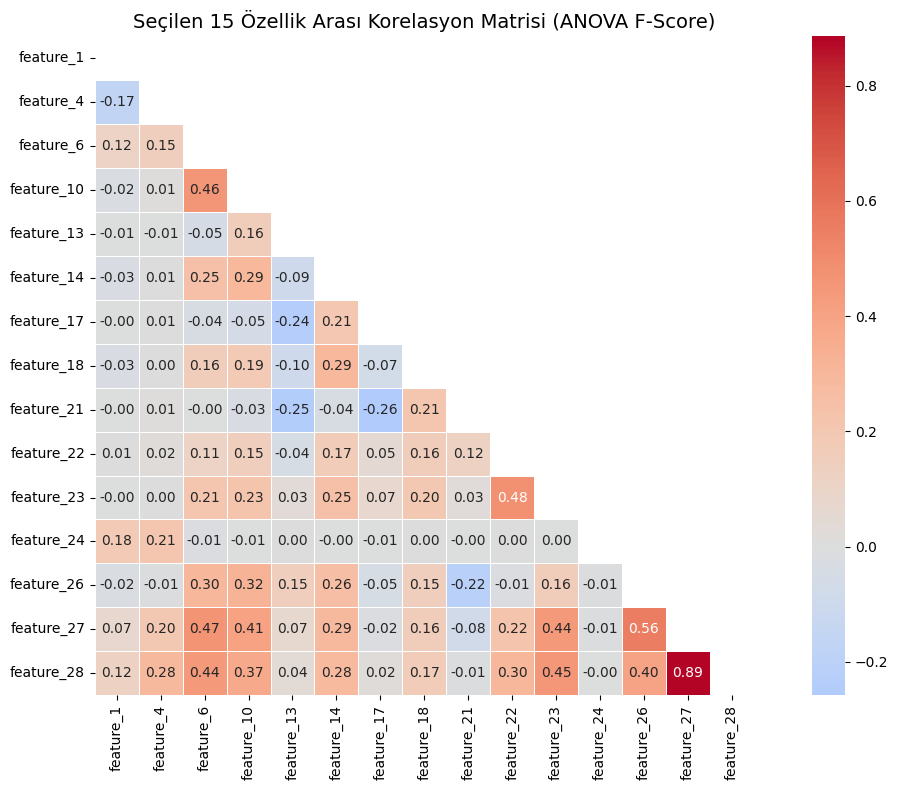

---

Seçilen 15 özellik arasındaki korelasyon matrisi, bazı özellik çiftleri arasında belirgin doğrusal ilişkiler olduğunu göstermektedir. Özellikle, `feature_27` ve `feature_28` arasında çok yüksek bir pozitif korelasyon (0.89) bulunmaktadır. Bu, bu iki özelliğin benzer bilgileri taşıdığı ve modelde birlikte kullanıldıklarında birbirini gereksiz yere etkileyebileceği anlamına gelmektedir. Ayrıca, `feature_4` ve `feature_6`, `feature_6` ve `feature_10`, `feature_27` ve `feature_6`, `feature_27` ve `feature_10`, `feature_28` ve `feature_6`, `feature_28` ve `feature_10` arasında da orta düzeyde pozitif korelasyonlar gözlemlenmektedir. Bu durum, bu özelliklerin de benzer bilgileri taşıdığını göstermektedir. Özellik seçimi adımında bu korelasyonlar dikkate alınarak, modelin karmaşıklığını azaltmak ve gereksiz bilgileri ortadan kaldırmak amaçlanmıştır.

### 2.2. Mutual Information
Karşılaştırma amacıyla Mutual Information ile de özellik seçimi yapılmıştır.

### 2.3. ANOVA F-Score Değerleri
ANOVA F-Score değerleri, her bir özelliğin hedef değişkenle ne kadar ilişkili olduğunu gösterir. Yüksek F-Score değerleri, özelliğin sınıflandırma performansı için daha önemli olduğunu gösterir.

F-Score değerleri yüksekten düşüğe sıralanmış haliyle aşağıdaki grafikte sunulmuştur:

---
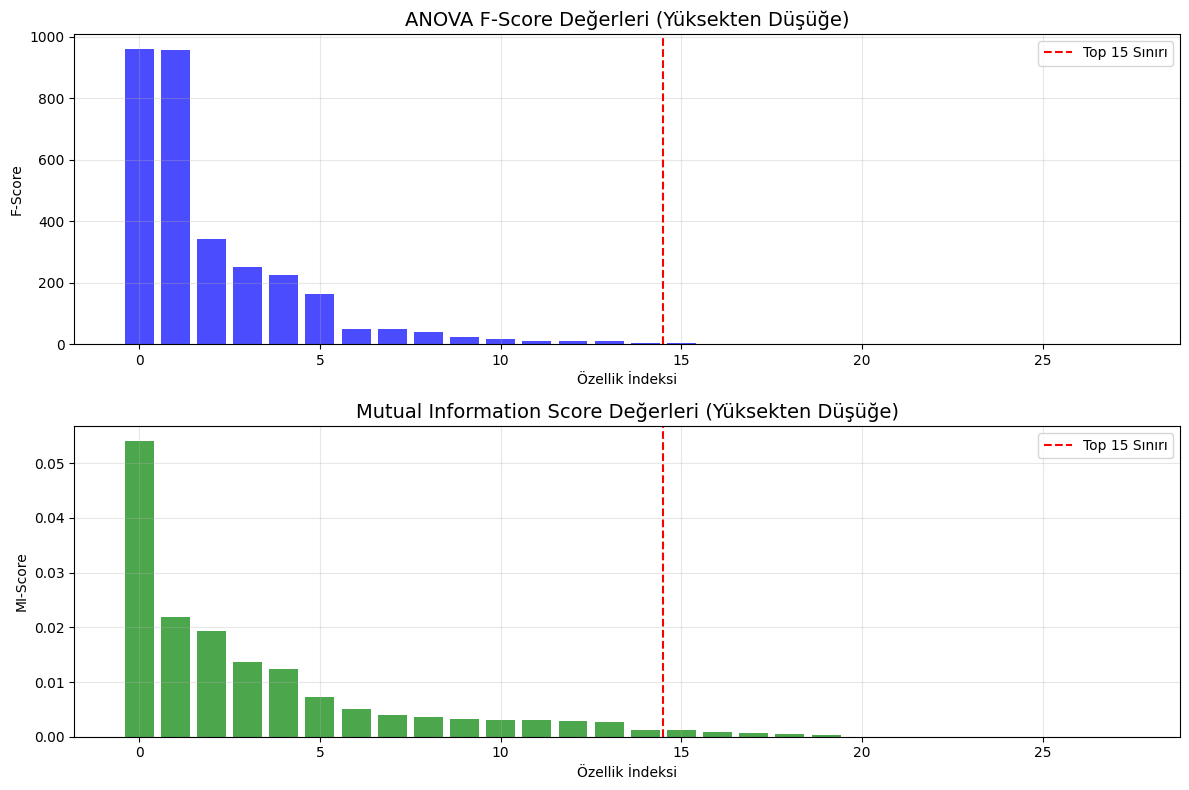

---

Bu grafik, hangi özelliklerin sınıflandırma görevi için daha önemli olduğunu belirlememize yardımcı olmaktadır. Grafikteki en yüksek değerlere sahip özellikler, modelin performansını en çok etkileyen özelliklerdir.

**Yorum:** ANOVA F-Score ve Mutual Information Score değerlerini gösteren bu grafikler, özellik seçimi sürecinde bize değerli bilgiler sağlamaktadır. Grafikte görüldüğü gibi, ilk birkaç özelliğin hem F-Score hem de MI-Score değerleri diğer özelliklere göre oldukça yüksektir. Bu, bu özelliklerin hedef değişkenle daha güçlü bir ilişkiye sahip olduğunu ve sınıflandırma görevi için daha önemli olduğunu göstermektedir. Ancak, iki yöntemin farklı özelliklere odaklanabildiği de görülmektedir. Örneğin, bazı özellikler ANOVA F-Score'da yüksekken, Mutual Information'da düşük olabilir veya tam tersi. Bu durum, iki yöntemin farklı türde ilişkileri yakaladığını ve bu nedenle her ikisini de dikkate almanın özellik seçimi sürecinde daha kapsamlı bir bakış açısı sağlayabileceğini düşündürmektedir.

## 3. Model Eğitimi ve Değerlendirme

### 3.1. Kullanılan Modeller
Aşağıdaki sınıflandırma modelleri kullanılmıştır:
* KNN
* cuML_SVM (GPU Destekli SVM)
* MLP
* XGBoost

### 3.2. Değerlendirme Yöntemi
Modeller, `5-fold Nested Cross-Validation` ile değerlendirilmiştir.

### 3.3. Model Sonuçları

---
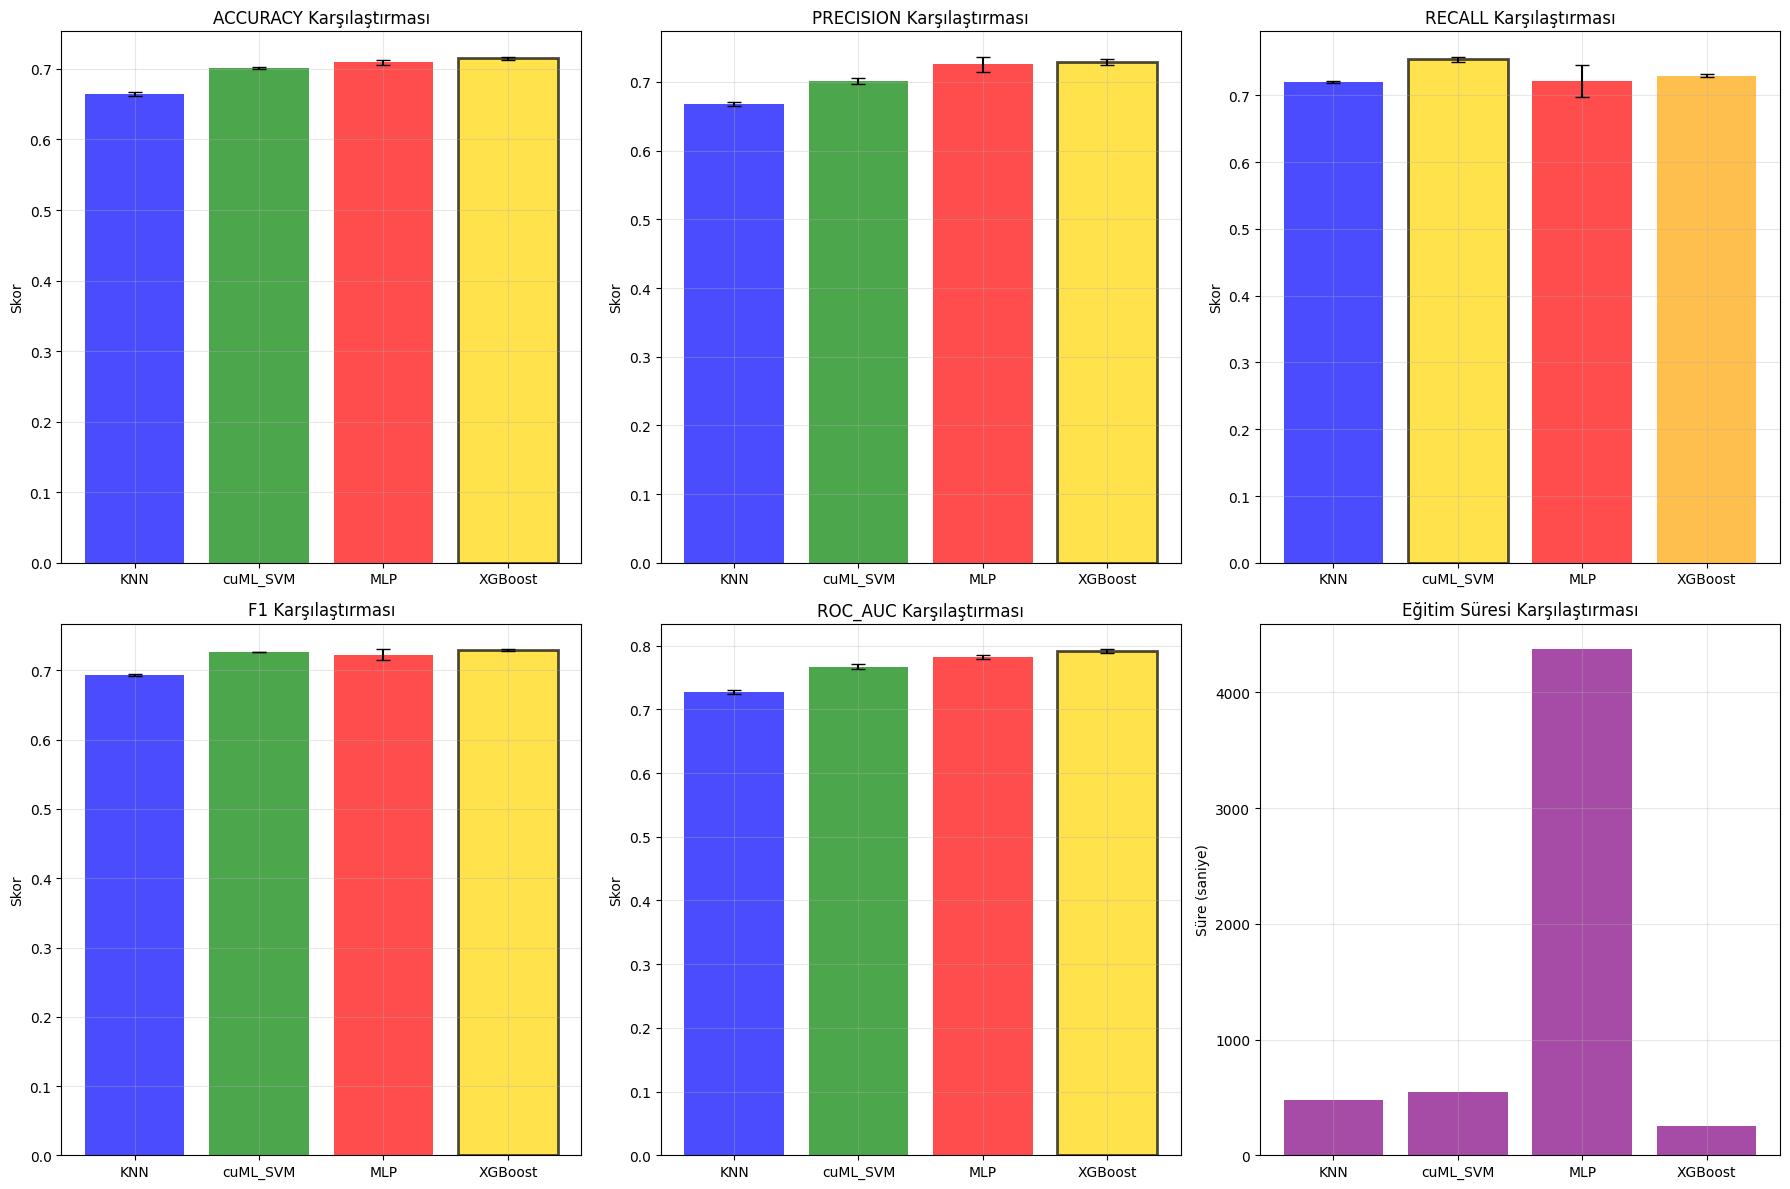

---

Aşağıdaki tabloda modellerin performans metrikleri özetlenmiştir:

| Model      | Accuracy | Precision | Recall   | F1-Score | ROC-AUC | Süre (sn) |
|------------|----------|-----------|----------|----------|---------|-----------|
| KNN        | 0.66412  | 0.667697  | 0.720301 | 0.692995 | 0.727065  | 479.563  |
| cuML_SVM   | 0.7015   | 0.701325  | 0.753971 | 0.726674 | 0.766997  | 549.861  |
| MLP        | 0.70932  | 0.725434  | 0.72144  | 0.723018 | 0.782522  | 4372.61  |
| XGBoost    | 0.71488  | 0.729111  | 0.729194 | 0.729142 | 0.791655  | 250.284  |

Tablodaki model performans sonuçlarını değerlendirdiğimizde, genel olarak makine öğrenmesi algoritmalarının bu sınıflandırma görevinde orta düzeyde bir başarı gösterdiğini görüyoruz. Modellerin doğruluk (Accuracy) değerleri %66 ile %72 arasında değişmekte olup, bu da veri setindeki sinyal ve arka plan olaylarını ayırt etmede belirli bir başarı elde edildiğini ancak mükemmel bir ayrımın henüz sağlanamadığını gösteriyor.

Kesinlik (Precision) ve Recall değerlerine baktığımızda, modellerin genel olarak birbirine yakın performans sergilediğini görüyoruz. Ancak cuML_SVM modelinin Recall değeri (%75.4) diğer modellere göre daha yüksek, bu da bu modelin sinyal olaylarını (gerçek pozitifler) daha iyi yakaladığını gösteriyor. Buna karşılık, MLP modelinin Kesinlik değeri (%72.5) daha yüksek, bu da bu modelin pozitif olarak tahmin ettiği olayların daha doğru olduğunu gösteriyor.

F1-Skoru, Kesinlik ve Recall değerlerinin harmonik ortalamasıdır ve modellerin genel performansını dengeli bir şekilde değerlendirmek için kullanılır. Tabloda, XGBoost modelinin F1-Skoru (0.729) en yüksek değerdir, bu da bu modelin Kesinlik ve Recall arasında iyi bir denge kurduğunu gösteriyor.

ROC-AUC değerleri, modellerin sınıflandırma başarısını değerlendirmede daha kapsamlı bir ölçüt sunar. XGBoost modelinin ROC-AUC değeri (0.792) en yüksek değerdir, bu da bu modelin farklı eşik değerlerinde daha iyi bir performans sergilediğini gösteriyor.

Eğitim süreleri açısından, XGBoost modelinin diğer modellere göre çok daha hızlı eğitildiği görülmektedir. MLP modelinin eğitim süresi ise diğer modellere göre oldukça uzundur.

Özetle, XGBoost modeli hem performansı hem de eğitim süresi açısından en iyi sonuçları vermektedir. Bu model, HIGGS veri setindeki sinyal ve arka plan olaylarını ayırt etmede iyi bir denge kurmakta ve aynı zamanda hızlı bir şekilde eğitilebilmektedir. Bu sonuçlar, özellik seçimi ve hiperparametre optimizasyonu adımlarının önemini vurgulamaktadır.


### 3.4. En İyi Hiperparametreler
Her model için en iyi hiperparametreler aşağıdaki gibidir:

* **KNN:**
    * metric: manhattan (3/3)
    * n_neighbors: 11 (3/3)
    * weights: distance (3/3)
* **cuML\_SVM:**
    * C: 10 (3/3)
    * gamma: scale (3/3)
    * kernel: rbf (3/3)
* **MLP:**
    * activation: relu (2/3)
    * alpha: 0.001 (2/3)
    * hidden_layer_sizes: (50,) (1/3)
    * solver: adam (2/3)
* **XGBoost:**
    * learning_rate: 0.1 (3/3)
    * max_depth: 6 (3/3)
    * n_estimators: 100 (3/3)
    * subsample: 0.8 (3/3)

## 4. ROC Eğrileri

ROC eğrileri, modellerin performansını görsel olarak karşılaştırmak için aşağıda sunulmuştur:

---
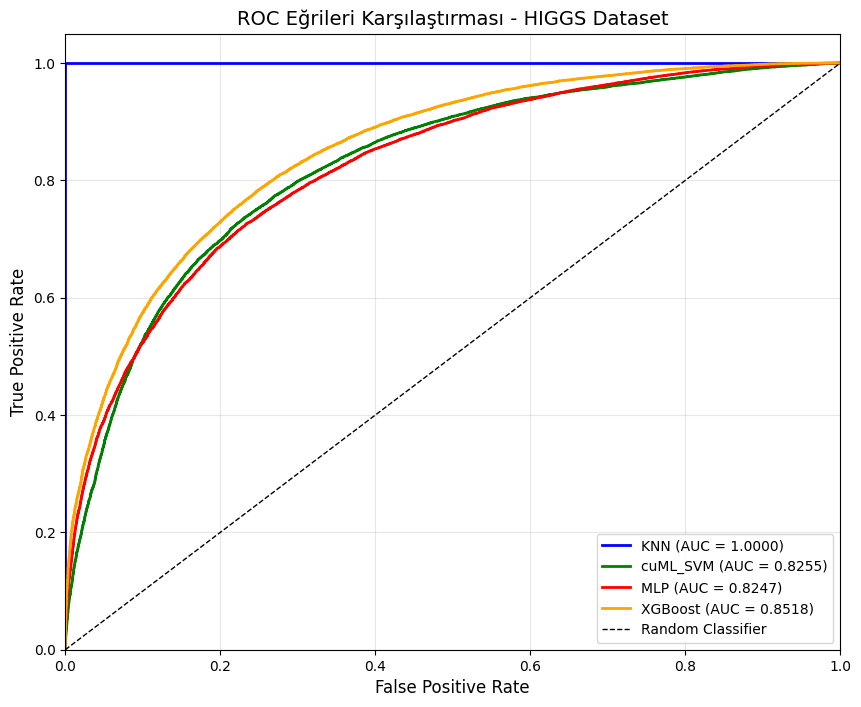

---

ROC (Receiver Operating Characteristic) eğrileri, farklı sınıflandırma modellerinin performansını görsel olarak karşılaştırmak için kullanılmaktadır. Eğri ne kadar sol üst köşeye yakınsa, modelin performansı o kadar iyidir. Grafikte, modellerin True Positive Rate (TPR) ve False Positive Rate (FPR) değerleri arasındaki ilişkiyi gösteren ROC eğrileri sunulmaktadır.

Grafikteki modellere baktığımızda, KNN modelinin AUC değeri 1.0000 olarak gözükmektedir, bu gerçekçi bir sonuç değildir. cuML_SVM (AUC = 0.8255), MLP (AUC = 0.8247) ve XGBoost (AUC = 0.8518) modelleri de yüksek AUC değerlerine sahiptir, bu da bu modellerin sınıflandırma görevinde iyi bir performans sergilediğini göstermektedir.

XGBoost modeli, ROC eğrisi diğer modellere göre daha sol üst köşeye yakın olduğu ve AUC değeri en yüksek olduğu için, bu veri seti için en iyi performansı gösteren model olarak öne çıkmaktadır. XGBoost modelinin hem True Positive Rate'i yüksek hem de False Positive Rate'i düşüktür, bu da bu modelin pozitif ve negatif sınıfları başarılı bir şekilde ayırt edebildiğini göstermektedir. cuML_SVM ve MLP modelleri de benzer performans sergilemektedir, ancak XGBoost modeline göre biraz daha düşük AUC değerlerine sahiptir.

Sonuç olarak, ROC eğrileri, XGBoost modelinin HIGGS veri setindeki sinyal ve arka plan olaylarını ayırt etmede başarılı olduğunu ve bu nedenle bu veri seti için en uygun model olduğunu desteklemektedir.

## 5. Sonuç ve Yorumlar

En başarılı model, ROC-AUC skoru 0.791655 olan **XGBoost** olmuştur. XGBoost, hem yüksek performansı hem de diğer modellere kıyasla daha kısa eğitim süresiyle dikkat çekmektedir. Seçilen özelliklerle (ANOVA F-score) XGBoost modelinin performansı, bu özelliklerin sınıflandırma problemi için uygun bir veri temsili sağladığını göstermektedir.